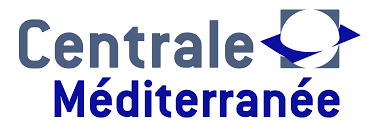

> <center><strong>Python Scientifique<br>
> Reconnaissance des caractères<br></center><br>
>Realisées Par:<br>              
Fatima zahra YACOUBI<br>
Hiba BENEL HARKATI





# **Introduction**<br>
La reconnaissance des chiffres manuscrits est la capacité des ordinateurs à reconnaître les chiffres manuscrits humains.
C'est une tâche difficile pour la machine car les chiffres manuscrits ne sont pas parfaits et peuvent être de différentes sortes.




# **Objectif**<br>
Comparer deux modele de supervision pour classification des digits, ainsi que leurs performances.


*   Réseau neuronal convolutif (CNN)
*   Forêt d'arbres décisionnels

Ces modeles seront expliqués en détails par la suite

# **Explication des modeles utilisés**<br>

<strong>1. Réseau neuronal convolutif (CNN):</strong>

Tout dabord définissons la notion de l'apprentissage automatique.
Imaginons que vous avez une image (par exemple , une photo d'un digit), et vous voulez que votre ordinateur soit capable de reconnaître ce digit. Le problème est que les images sont composées de millions de petits pixels, et l'ordinateur doit comprendre ce que chaque pixel représente.

Les réseaux de neurones convolutifs aident l'ordinateur à faire ça, mais de manière automatique.





  **1.1 Caractéristiques du CNN**

Dans un CNN, comme dans un cerveau humain, il y a des *Neurones* qui traitent l'information. Ces neurones sont organisés en couches.


> **Couche d'entrée**: C'est l'endroit où limage entre dans le réseau. L'image est composée de pixels, qui contiennent des informations tels la couleur et la luminosité.<br><br>
**Couche convolutive**: Ces couches passent sur l'image et cherchent des caractéristiques spécifiques comme des bords, des formes. Chaque petite région de l'image est analysée pour trouver des motifs.<br><br>
**Couche de pooling**: Ils réduisent la taille de l'image, mais gardent les informations importantes. Cela permet de réduire la complexité faite par l'ordinateur.<br><br>
**Couche entièrement connectée (Dense)** : Après avoir extrait toutes les caractéristiques importantes de l'image, cette couche prend toutes ces informations et fait une décision, comme dire : "C'est le digit 2 qui correspond a l'image dentrée"<br><br>
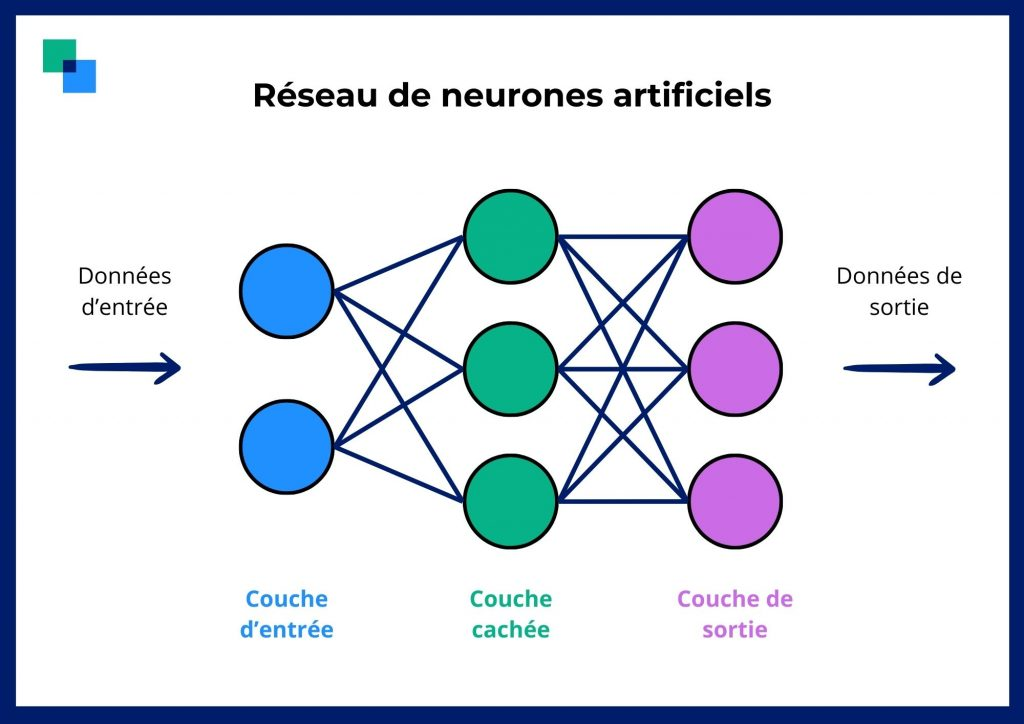



  **2.2 Fonctionnement du CNN**

Après avoir pris connaissance des éléments essentiels dans un CNN, plongeons-nous un peu dans les mathématiques derrière, et comment l'ordinateur fait les calculs


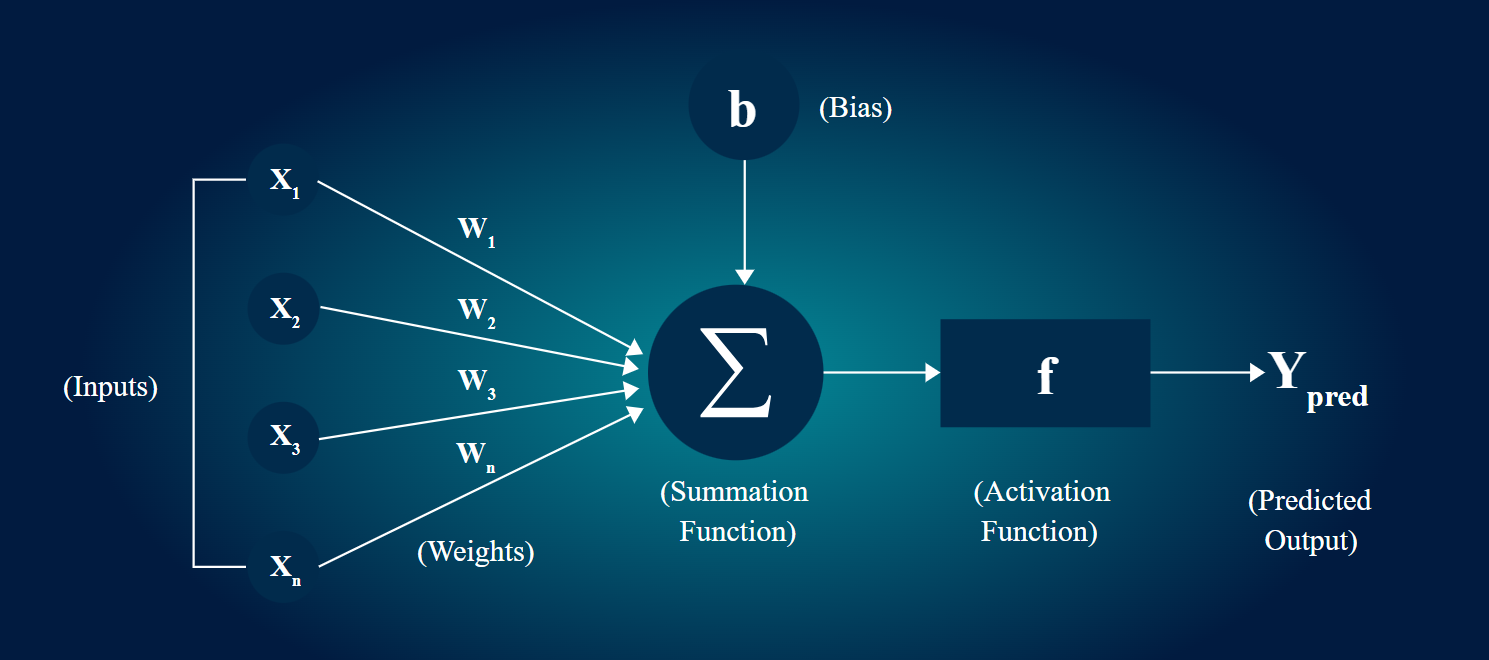

> **Neurones** sont modelisés dans la figure juste au dessus par les X1, X2, X3 reçoivent des signaux d'entrée et effectuent des calculs pour produire une sortie.<br><br>
**Poids** représentés par wi déterminent l'importance du signal d'entrée, les poids dans un CNN  sont regroupés dans les filtres (matrices ou tableau) dans les couches convolutionnelles, où chaque filtre fait un produit convolutionnel (car il concerne le produit entre matrices) avec la matrice de la couche precedente qui au début on a une image,
et enfin on obtient des sorties et on continue le même cycle<br><br>
**Fonctions d'activation** sont des valeurs de seuil qui introduisent des non-linéarités dans le réseau neuronal, lui permettant de comprendre les relations complexes entre les entrées et les sorties, et permettent de rejeter même les neurones dont la valeur est négative afin d'éviter les computation complexes. Dans notre cas on va utiliser la fonction *ReLU* qui transforme les entrées négatives en zéro et laisse passer les entrées positives sans modification<br><br>
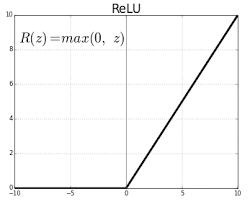






**2. Forêt d'arbres décisionnels**

Une forêt aléatoire est une technique utilisée en apprentissage automatique pour faire des prédictions ou des classifications à partir de données, par exemple des digits dans notre cas.

  **2.1 Caractéristiques du forêt d'arbres décisionnels**

Dans une forêt aléatoire, chaque arbre essaie de classer ou de prédire quelque chose à partir des données que l'on lui donne. Mais au lieu de se fier à un seul arbre, on en utilise beaucoup d'arbres. Chacun de ces arbres prend une décision en se basant sur les informations qu'il a reçues, et ensuite, la majorité des arbres, la décision la plus fréquente parmi tous les arbres sera choisie comme réponse finale

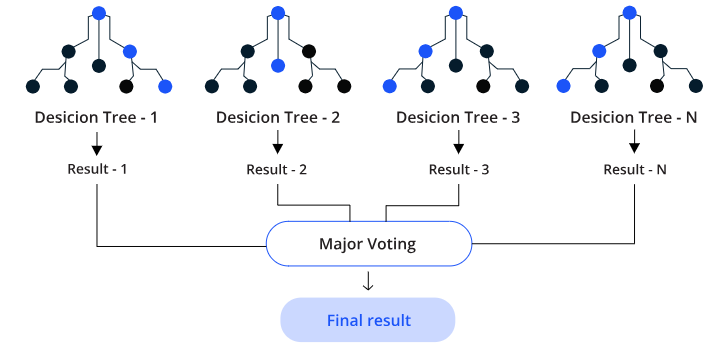

<center>
Exemple d'une forêt construite avec N arbres de décision
</center>

**2.2 Arbre de décision**

>**Arbre de décision** Créer plusieurs arbres de décision, chaque arbre regarde une partie des données, par exemple :
*  La taille des traits
*  Position des boucles (comme celle du chiffre 6)
*  Symétrie du chiffre (par exemple, un 8 est très symétrique)
*  Les coins et les lignes droites (comme les 4 ou les 7)


**2.3 Caractéristiques des arbres de décision**

>**Nœud racine** Lorsqu'un arbre est créé dans une forêt aléatoire, il choisit un sous-ensemble des pixels  de caractéristiques *aléatoirement* pour prendre ses décisions<br>
**Nœuds internes** représentent les tests sur les pixels (taille des traits,
la position, la position de la luminsité...)<br>
**Branches** représentent le résultat d'une décision ou d'un test, menant au nœud suivant<br>
**Nœuds feuilles** représentent la décision ou la prédiction finale


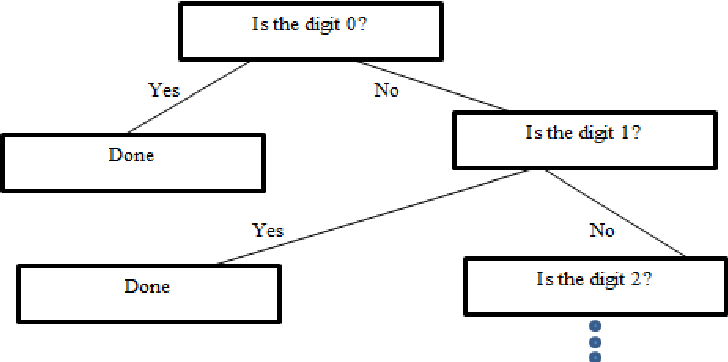

<center>Exemple simplifié du fonctionnement d'arbre de décision





---
---



# **Partie code**<br>



>Dans cette partie, nous allons mettre en œuvre les deux modèles en suivant ces étapes qui seront detaillés dans chaque partie.<br>

 >**1.   Bibliothèques**<br>
 **2.   Préparation du dataset (normalisation des pixels) : MNIST**<br>
 **3.   Création du modèle (CNN)**<br>
 **4.   Compilation du modèle**<br>
**5.   Entraînement du modèle**<br>
**6.   Visualisation des résultats d'entraînement**<br>
**7.   Test du modèle**<br>
**8.   Test des images (notre propres images prises par une caméra**<br>
**9.   Limites du modèle**<br>
**10.  Bibliographie**<br>




---




**1. Importation des biliothèques**

Une bibliothèque est un ensemble de fichiers qui contient des fonctionnalités et des outils prêts à être utilisés

In [ ]:
#Bibliothèques contenant les fonctions d'apprentissage automatique(CNN)
import tensorflow as tf                 #Utilisé pour construire et entraîner les réseaux neuronaux dont on a entamé avant
from tensorflow.keras import Sequential  #Sequential permet de créer des modèles de réseaux neuronaux en empilant des couches par ordre
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D    #Importation des couches spécifiques de Keras utilisées pour définir l'architecture d'un réseau neuronal chacune de ces importations sera entamée lors de la construction de notre modèle
from tensorflow.keras import models

#Bibliothèque pour le traitement et l'analyse des données numériques
import numpy as np

#Bibliothèque pour la visualisation des données
import matplotlib.pyplot as plt

#Bibliothèque pour le traitement d'images
import cv2

#Bibliothèque pour générer des nombres aléatoires
import random



><br>La cellule ci-dessous a été ajoutée lorsque nous avons remarqué que les résultats changent à chaque exécution, même si l'architecture et ses paramètres sont les mêmes. Ainsi, nous définissons une graine pour le générateur de nombres aléatoires. Cela garantit que les résultats aléatoires seront les mêmes à chaque exécution, ce qui permet de reproduire les mêmes résultats lors de l'exécution du programme.

In [ ]:
random.seed(42)             # Fixe la graine pour Python
np.random.seed(42)          # Fixe la graine pour Numpy
tf.random.set_seed(42)      # Fixe la graine pour Tensorflow

**2. Préparation des données**

**2.1 Chargement et la divion des données**

> Ajouter une citation



>MNIST est une base de données disponible pour les chiffres manuscrits, les images des chiffres ont été extraites de divers documents numérisés.
      
>*   Chaque image est de mesure 28x28 pixels
*   60000 images pour entraîner le réseau
*   10 000 images pour tester les performances de notre CNN entrainé

     

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()              #ceci permet de charger les images retourne un tuple (couple (x,y)) pour l'entrainement et le test, avec x est pour les images  et y pour l'étiquette des chiffres (1,2...,9)
x_train.shape, y_train.shape, x_test.shape, y_test.shape                              # affichage des tailles des images

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

On remarque que:

*  Le pourcentage des données consacrées pour l'apprentissage est de 85% afin d'assurer de bonnes performances lors de la prédiction.
*   Nous pouvons bien voir que les données ont une taille de 28x28.

*  10 000 est le nombre d'images pour le test
* (60000, 28, 28) : 60000 images avec 28x28 pixels (2 dimensions).

* (60000,) : 60000 étiquettes, dans une seule dimension où chaque étiquette (chiffre) correspond à l'image.

**2.2 Visualisation de données**

>Ce qu'on essaie de faire, c'est de comparer le manuscrit du digit 3 se trouvant dans notre MNIST

3


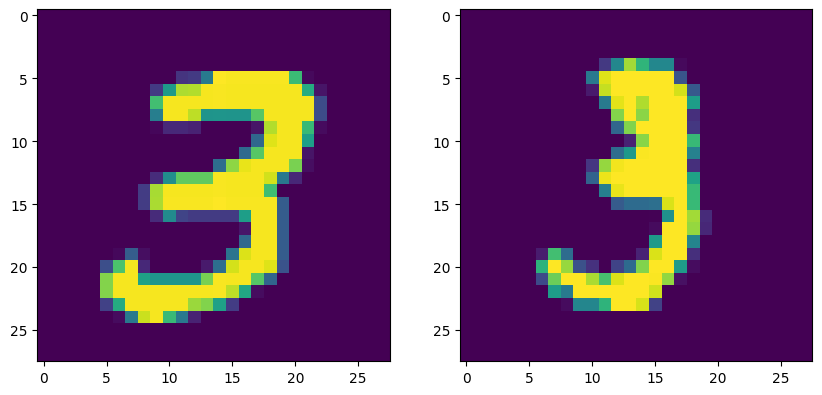

In [ ]:
figure, axes = plt.subplots(1,2, figsize=(10, 5))   #ceci crée deux sous-graphes avec une ligne et 2 colonnes
axes[0].imshow(x_train[7])     #affichage de la première image
axes[1].imshow(x_train[10])    #affichage de la deuxième image

print(y_train[7])

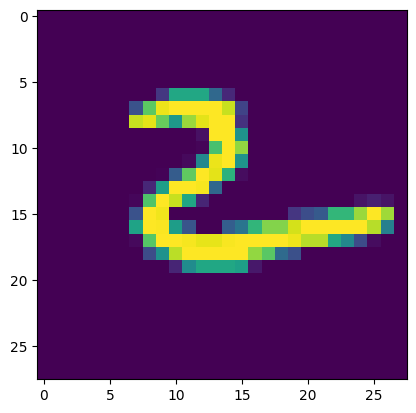

In [ ]:
plt.imshow(x_train[109])

>Les images manuscrites prennent différentes formes.

>Pour chaque pixel d'une image (notre exemple : 3), il correspond à son chiffre approprié à la sortie.

**2.3 Normalisation**

>La *normalisation* des pixels consiste à ramener les valeurs des pixels qui sont entre (0 pour le noir à 255 pour le blanc) d'une image de 0 à 1. Ceci permet au modèle d"apprendre plus facilement

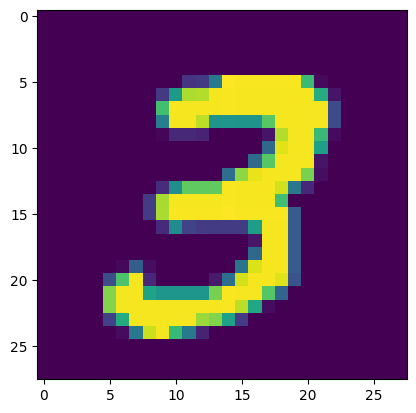

In [ ]:
# Normalisation  des valeurs de pixels
x_train, x_test= x_train/255, x_test/255

#visualisation du tabeau de pixels apres normalisation
plt.imshow(x_train[7])

**3.4- Redimensionnement des images**

>Le redimensionnement des images permet l'application facile des CNN en utilisant TensorFlow.

>MNIST contient des images 2D (binaires), mais la structure 2D ne spécifie pas que les images ont un seul canal (échelle de gris). Ainsi, pour permettre à la fonction Conv2D de détecter les traits caractéristiques des images, nous devons spécifier la dimension supplémentaire.

In [ ]:
x_train = tf.reshape(x_train, (60000, 28, 28, 1))
x_test = tf.reshape(x_test, (10000, 28, 28, 1))

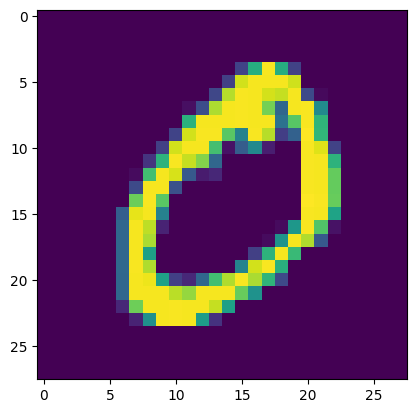

In [ ]:
plt.imshow(x_train[1])   #image apres buitage

**3. Création du modèle CNN**

>Le principe de construction d'un réseau neuronal est de donner au modèle des petites informations au début (comme des petits morceaux d'image) pour qu'il apprenne à repérer des détails fins, comme des bords ou des motifs. Ensuite, on lui donne des morceaux plus grands pour qu'il puisse comprendre des formes plus larges.
Ceci permet au réseau d'apprendre à reconnaître des éléments de plus en plus complexes, en commençant par les petits détails et en allant vers des éléments plus globaux.



```
Remarque
```

>L'architecture ci-dessous est commentée et il faut exécuter directement la cellule suivante ```model = models.load_model('mon_modele_CNN.h5') ``` contenant le modèle que nous avons entraîné avant et dont on a obtenu les poids appropriés, et lesquels ont donné de bons résultats avec la même architecture.<br>


In [ ]:
# Création d'un nouveau modèle Sequentiel qui permet de définir un réseau où chaque couche est ajoutée les unes après les autres
#model = Sequential()


# Première couche de convolution : 32 neurones, convolution 3x3, fonction d'activation 'relu'
#model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D(pool_size=(2,2)))


# Deuxième couche de convolution : 16 neurones, convolution 3x3, fonction d'activation 'relu'
#model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))




#model.add(Flatten())      #Couche qui permet l'aplatissage des couches précédentes
#model.add(Dense(128, activation='relu'))
# Couche de sortie : 10 neurones, fonction d'activation 'softmax' qui s'applique aux problèmes multi-classes
#model.add(Dense(10, activation='relu'))

#model.add(Dense(10, activation='softmax'))


>L'intérêt est que le fichier mon_modele_CNN.h5 a été généré lors d'un entraînement précédent. Il contient les poids du modèle, ce qui permet de réutiliser directement ce modèle sans avoir à l'entraîner à nouveau et perdre les poids.

In [ ]:
model = models.load_model('sample_data/modele1.h5')  #On charge un modèle préalablement entraîné et sauvegardé dans le fichier 'modele.h5
model.summary()    #afficher un résumé du modèl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,644 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

>Le résumé contient :
>*   La structure du modèle (les couches du réseau, leurs types et tailles)  
*   Le nombre total de paramètres d'entraînement pour chaque couche
*   Les formes des sorties à chaque étape du modèle

**4. Compilation du modèle**

Dans cette étape, la compilation dans est essentielle pour préparer un modèle avant de l'entraîner. Elle configure le modèle avec ces éléments importants nécessaires pour l'entraînement:

>**L'optimiseur** est comme un guide qui aide le
modèle à apprendre pendant l'entraînement. Adam est un optimiseur populaire qui ajuste automatiquement la vitesse à laquelle le modèle apprend.<br><br>
>**Loss** ou la fonction de perte, mesure combien le modèle se trompe lors des prédictions. L'objectif est de minimiser cette valeur (erreur) pendant l'entraînement.<br><br>
>**Métrique** sert à mesurer la performance du modèle pendant l'entraînement et specifiquement la proportion de bonnes prédictions faites par le modèle par rapport à l'ensemble des données. Cela nous donne une idée de la précision du modèle.

In [ ]:
#initialiser les paramtres du compilateur avant l'entraînement
#model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

**4. Entraînement du modèle**

Entraîner le modèle avec des données a apprendre x_train et ses y_train pour les sorties attendues, avec les éléments suivantes:<br>
>**batch_size**: Cela indique que les données d'entraînement seront divisées en lots de 128 échantillons. Pendant chaque itération, le modèle traite un batch de données à la fois pour ajuster les poids afin d'éviter la surcharge de la mémoire.<br><br>
**epochs**: Ceci signifie le nombre de fois que le modèle passera par l'ensemble de données d'entraînement





!! Assurez-vous d'exécuter fit() avec un GPU dans Google Colab, car sur un GPU, les calculs sont accélérés, réduisant significativement le temps d'entraînement de min en quelques seconds.

In [ ]:
#Le nombre d'époques est considéré comme un hyperparamètre. Il définit le nombre de fois que l'ensemble de données doit être travaillé à travers le algorithme d'apprentissage
#model.fit(x_train,y_train,batch_size=128,epochs=10)

# Sauvegarde du modèle
#model.save('modele.h5')

>Les résultats montrent l'évolution de la précision et de la perte du modèle pendant l'entraînement. Dès la première époque, le modèle atteint une précision de
**99.76%** et une perte de **0.0076**, ce qui indique qu'il commence à bien prédire. Au fur et à mesure des époques, la précision continue d'augmenter, tandis que la perte diminue.<br>
>Le temps par étape varie entre 2 à 8 secondes selon l'époque, ce qui est rapide, en particulier si l'entraînement est effectué avec un GPU

>- Ces résultats suggèrent que le modèle est bien entraîné, avec une excellente précision
>- Il est important de valider ces performances sur un ensemble de test


**5. Evaluation du modèle**

In [ ]:
loss, accuracy=model.evaluate(x_test,y_test)
print("loss:",loss)     #Affichage de la valeur de perte du modèle après l'entraînement
print("accuracy:",accuracy)       #Affichage de la precision du modèle après l'entraînement

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0527
loss: 0.04260895401239395
accuracy: 0.9908000230789185


>Avec une perte (loss) de moyenne 0.0407 et une précision de moyenne(accuracy) de **99.07%**, le modèle montre des performances très élevées, bien qu'un peu inférieures à celles observées précédemment avec des résultats proches de 99.83%

**5.2 Prédictions sur les données de test**

>La prédiction sera un tableau contenant les résultats des probabilités d'appratenance a l'une des classes.

In [ ]:
# Prédire les étiquettes des images de test (x_test) en utilisant le modèle entraîné
predictions=model.predict(x_test)

# Afficher la prédiction pour l'image à l'index 56 du jeu de test
print(predictions[56])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[5.30653850e-26 1.02498856e-22 2.42124452e-29 2.11583145e-28
 1.00000000e+00 3.59844973e-21 4.18709446e-22 1.01116721e-21
 2.44166531e-24 9.23750847e-19]


>Le modèle prédit que l'étiquette correcte pour cet échantillon est la **classe 4**, avec une probabilité de **100%**. Les autres classes sont considérées comme extrêmement faibles


---



>Pour obtenir la classe avec la probabilité la plus élevée, on utilise la fonction np.argmax qui renvoie l'indice de la valeur la plus élevée

In [ ]:
predicted_class = np.argmax(predictions[56])      #retourne l'indice de la classe ayant la plus grande proba
print("Classe prédite :", predicted_class)

Classe prédite : 4


> Maintenant, vérifions si la valeur prédite correspond vraiement a l'image contenant le digit 4

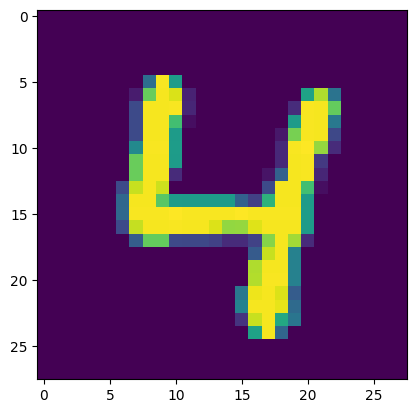

In [ ]:
plt.imshow(x_test[56])

>Donc, on voit bien que la valeur prédite correspond bien a 4

**5.3 Matrice de confusion pour visualisation**

>La matrice de confusion représente les performances du modèle de classification CNN de chiffres

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


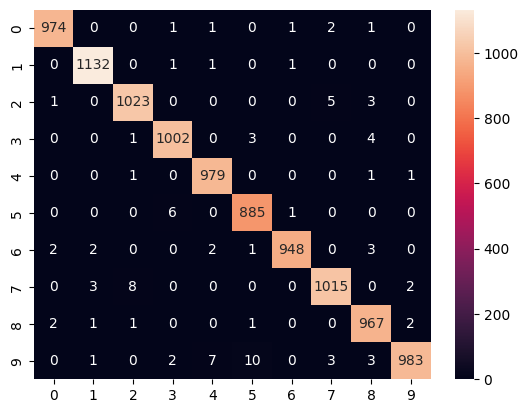

In [ ]:
 #Cette bibliothèque de scikit-learn pour calculer la matrice de confusion
from sklearn.metrics import confusion_matrix

#Pour la visualisation des données
import seaborn as sns

#cette ligne utilise le modèle entraîné pour faire des prédictions sur le jeu de test (x_test)
y_pred = model.predict(x_test)

#argmax prend l'indice de la plus haute probabilité pour obtenir la classe prédite
y_pred_classes = np.argmax(y_pred, axis=1)

#Crée la matrice de confusion en comparant :y_test: les vraies classes et y_pred_classes : les classes prédites par le modèle
cm = confusion_matrix(y_test, y_pred_classes)

#Création de la visualisation avec : (annot=True: affiche les valeurs dans chaque cellule, fmt="d" : format les nombres en entiers)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

Les abscisses représentent les classes prédites et les ordonnées représentent les classes réelles

>Analyse des résultats:
* La diagonale principale contient les valeurs les plus élevées (entre 883 et 1131), ce qui indique une bonne performance générale
* Le chiffre 1 semble être le mieux classifié avec 1131 prédictions correctes
* Il y a 13 cas où le chiffre 7 a été confondu avec le chiffre 2
* Certains chiffres semblent difficiles à distinguer, tels que les digits2 et 8

**5. Test final**

>Dans cette dernière partie du CNN, nous allons tester notre modèle sur notre propre manuscrit.


>Le **surapprentissage** se produit lorsqu'un modèle apprend trop bien les détails des données d'entraînement. Cela revient à "mémoriser" plutôt qu'à "comprendre". Par exemple, un modèle qui reconnaît uniquement des chats gris échouerait à détecter des chats d'autres couleurs.  



---



>On va tester les chiffres dont la corrélation entre eux étaient élevée

>Commencons par le digit **2**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
[[2.3837771e-02 6.5300998e-04 7.5415486e-01 1.4023060e-02 1.1574138e-04
  1.1098781e-04 7.3215924e-02 1.5483618e-05 1.3385421e-01 1.8846320e-05]]
Classe prédite : 2


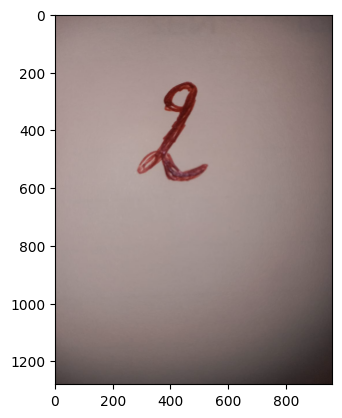

In [ ]:
#Charge une image en utilisant OpenCV format 3D (Red, Blue, GRIS) en couleurs
img=cv2.imread("sample_data/deux1.jpg")

#affichage de l'image
plt.imshow(img)

#Convertit l'image de BGR en niveaux de gris, car le modèle CNN crees attendent des images en niveaux de gris
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#traitement de l'image:

#Redimensionne l'image en 28x28 pixels car cest la dimension que l'entrée de notre modele attend
img=cv2.resize(img,(28,28))


#Restructure l'image pour correspondre au format attendu par le modèle: (1:nombre d'images; 28,28:dimensions de l'image; 1 : nombre de canaux (niveaux de gris))
img=img.reshape(1,28,28,1)


#Normalise les valeurs des pixels entre 0 et 1
img=img/255

#Faire les predictions comme precedent
predictions=model.predict(img)
print(predictions)
predicted_class = np.argmax(predictions)      #retourne l indice de la classe ayant la plus grande proba
print("Classe prédite :", predicted_class)



>Après avoir chargé et prétraité l'image deuxxx.jpg (conversion en niveaux de gris, redimensionnement à 28x28 pixels, normalisation des pixels entre 0 et 1, et ajustement du format pour le modèle), une prédiction a été effectuée avec le modèle CNN. Le modèle a identifié correctement la classe associée à l'image comme étant 2.



---



>On reste dans le digit 2 et cette fois-ci on enlève les boucles en bas et en haut et inclinant un peu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[1.3996328e-01 6.9915623e-05 6.0113412e-01 5.7891267e-03 1.8797664e-05
  3.4542027e-05 1.9729991e-01 2.6642099e-06 5.5665474e-02 2.2247965e-05]]
Classe prédite : 2


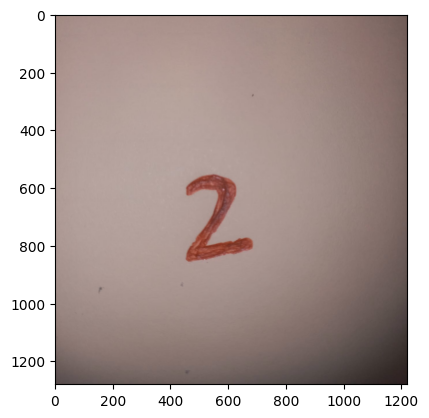

In [ ]:
#Charge une image en utilisant OpenCV format 3D (Red, Blue, GRIS) en couleurs
img=cv2.imread("sample_data/deux2.jpg")

#affichage de l'image
plt.imshow(img)


#Convertit l'image de BGR en niveaux de gris, car le modèle CNN crees attendent des images en niveaux de gris
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#traitement de l'image:

#Redimensionne l'image en 28x28 pixels car cest la dimension que l'entrée de notre modele attend
img=cv2.resize(img,(28,28))

#Restructure l'image pour correspondre au format attendu par le modèle: (1:nombre d'images; 28,28:dimensions de l'image; 1 : nombre de canaux (niveaux de gris))
img=img.reshape(1,28,28,1)


#Normalise les valeurs des pixels entre 0 et 1
img=img/255

#Faire les predictions comme precedent
predictions=model.predict(img)
print(predictions)
predicted_class = np.argmax(predictions)      #retourne l indice de la classe ayant la plus grande proba
print("Classe prédite :", predicted_class)


>Le modèle identifie encore la classe associée à l'image comme étant 2.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[3.7996612e-02 2.8846855e-06 2.1932049e-01 6.0216323e-03 1.9695817e-08
  2.2546013e-04 6.8847336e-02 5.6042033e-09 6.6758299e-01 2.5877246e-06]]
Classe prédite : 8


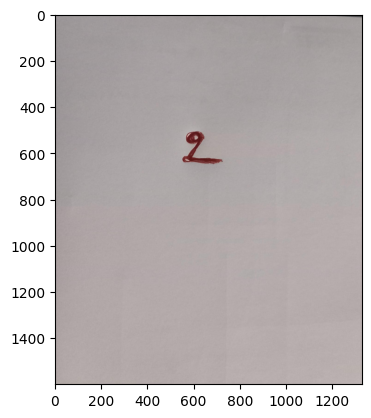

In [ ]:
#Charge une image en utilisant OpenCV format 3D (Red, Blue, GRIS) en couleurs
img=cv2.imread("sample_data/deux3.jpg")

#affichage de l'image
plt.imshow(img)

#Convertit l'image de BGR en niveaux de gris, car le modèle CNN crees attendent des images en niveaux de gris
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#traitement de l'image:

#Redimensionne l'image en 28x28 pixels car cest la dimension que l'entrée de notre modele attend
img=cv2.resize(img,(28,28))

#Restructure l'image pour correspondre au format attendu par le modèle: (1:nombre d'images; 28,28:dimensions de l'image; 1 : nombre de canaux (niveaux de gris))
img=img.reshape(1,28,28,1)


#Normalise les valeurs des pixels entre 0 et 1
img=img/255

#Faire les predictions comme precedent
predictions=model.predict(img)
print(predictions)
predicted_class = np.argmax(predictions)      #retourne l indice de la classe ayant la plus grande proba
print("Classe prédite :", predicted_class)


>L'analyse de la prédiction erronée du CNN montre qu'il a prédit un 8 au lieu d'un 2. Examinons donc les cartes de caractéristiques de la première couche

>Avant définissons ce qu'une carte de caractéristique


>Les cartes de caractéristiques ont les sorties générées après qu'une image passe à travers les filtres de convolution d'une couche CNN, chaque filtre a sa propore carte de caractéristique

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


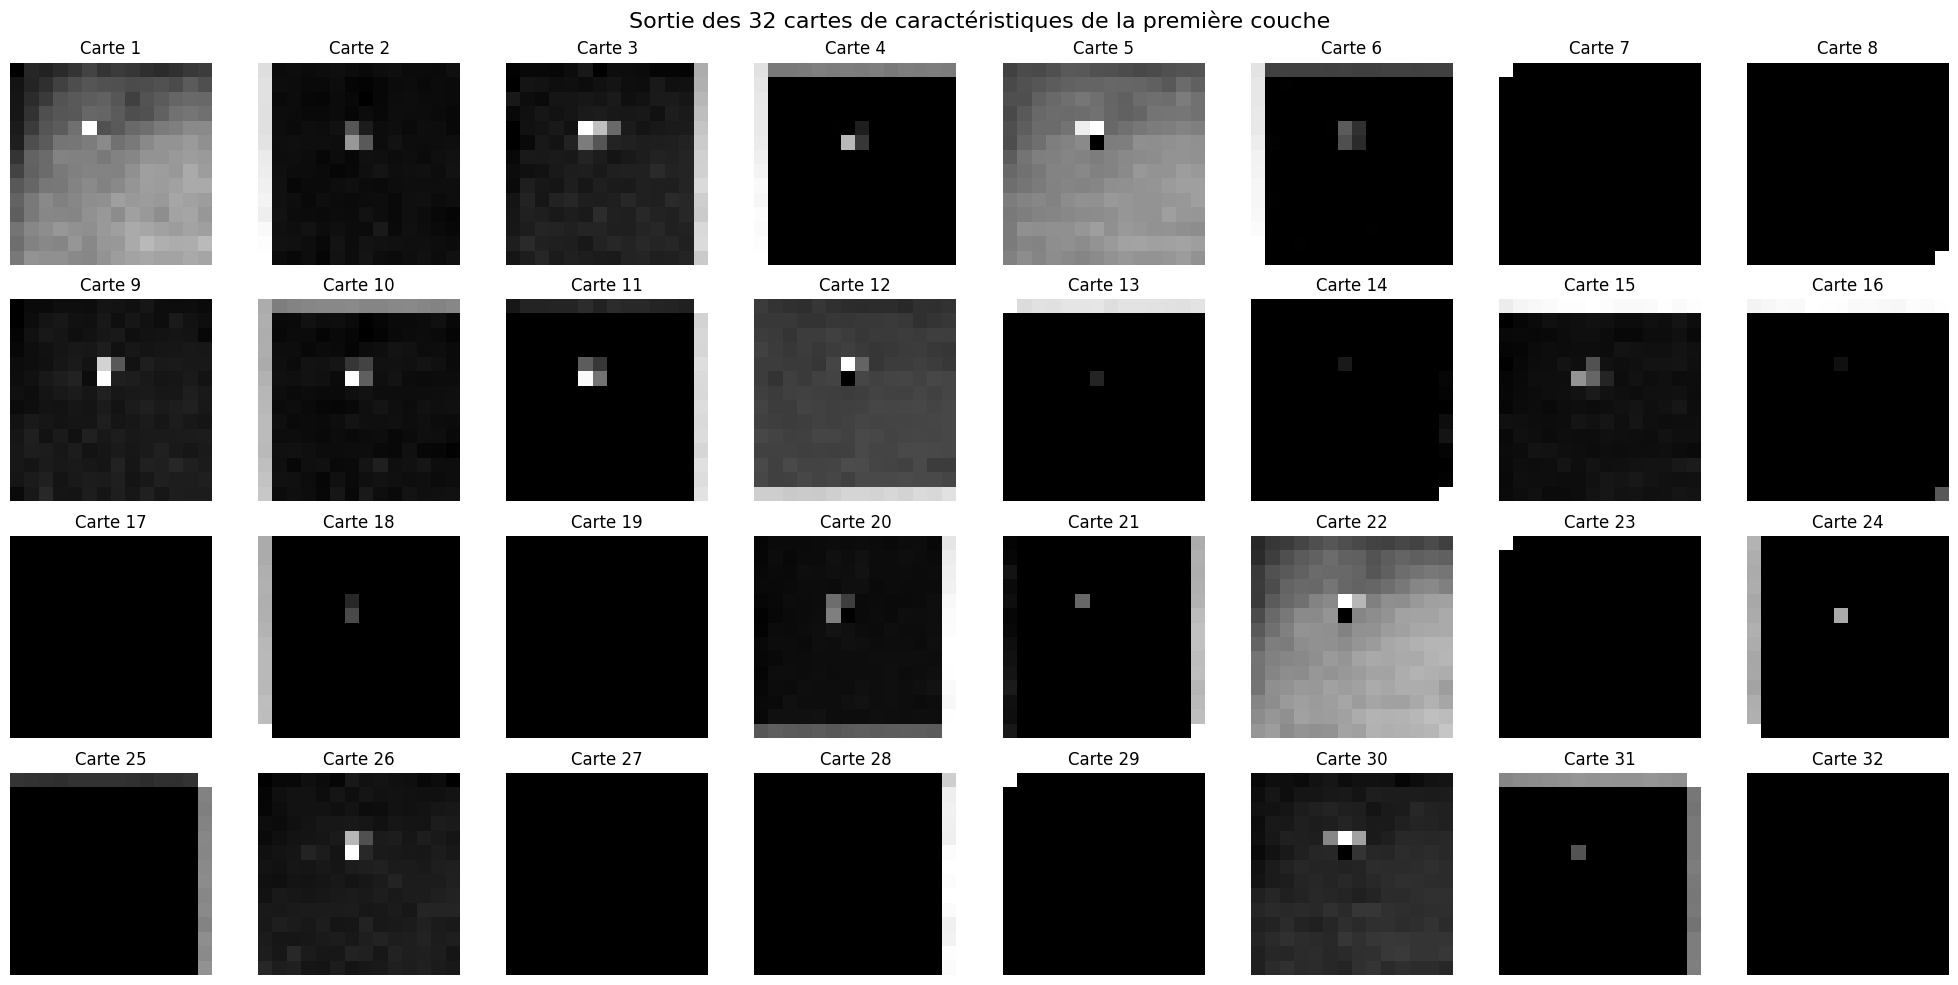

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Créer le modèle
model1 = Sequential()

# Première couche de convolution
model1.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Charger l'image "deux.jpg"
img = image.load_img('sample_data/deux3.jpg', target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)  # Convertir l'image en tableau numpy
img_array = np.expand_dims(img_array, axis=0)  # Ajouter la dimension du batch
img_array = img_array / 255.0  # Normaliser les pixels entre 0 et 1

# Créer un modèle pour obtenir la sortie après la première couche
intermediate_model = Sequential(model1.layers[:2])  # Inclut uniquement la première couche
output = intermediate_model.predict(img_array)

# Nombre total de cartes de caractéristiques (32 pour la première couche)
n_maps = output.shape[-1]  # Cela correspond à 32 pour la première couche

# Visualiser les 32 cartes de caractéristiques
fig, axes = plt.subplots(4, 8, figsize=(20, 10))  # Créer une grille de 4x8 pour afficher 32 cartes
axes = axes.ravel()

for i in range(n_maps):
    ax = axes[i]
    ax.imshow(output[0, :, :, i], cmap='gray')  # Afficher chaque carte de caractéristiques
    ax.axis('off')
    ax.set_title(f"Carte {i+1}")

plt.suptitle('Sortie des 32 cartes de caractéristiques de la première couche', fontsize=16)
plt.tight_layout()
plt.show()



>Les filtres actifs (ceux qui montrent des zones claires) semblent se concentrer sur :
Les contours courbes (visible dans les cartes 8, 13, 22, 32)
Les segments horizontaux et verticaux (cartes 6, 14, 23, 26, 28...)<br>
Cette activation pourrait expliquer la confusion car :<br>
Le chiffre 8 et le chiffre 2 partagent des caractéristiques visuelles similaires
Les deux ont des courbes supérieures similaires
Les deux ont des segments droits

In [ ]:
# Rechargeons le modele de nouveau pour des predictions sur dautres digits
model = models.load_model('sample_data/modele1.h5')  #On charge un modèle préalablement entraîné et sauvegardé dans le fichier 'modele.h5



---



**Prédiction de cinq**

>Le choix de cinq revient au faite que 5 est confondur 6 fois au digit 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
[[2.5029904e-06 6.7896372e-10 1.3216648e-01 8.6696529e-01 4.3623097e-13
  2.9343321e-06 7.1338422e-05 4.5155420e-12 7.9151004e-04 1.3033082e-10]]
Classe prédite : 3


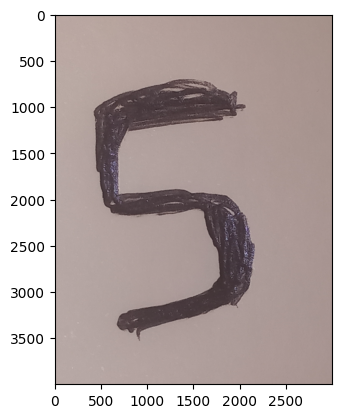

In [ ]:
#Charge une image en utilisant OpenCV format 3D (Red, Blue, GRIS) en couleurs
img=cv2.imread("sample_data/cinq1.jpg")

#affichage de l'image
plt.imshow(img)


#Convertit l'image de BGR en niveaux de gris, car le modèle CNN crees attendent des images en niveaux de gris
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#traitement de l'image:

#Redimensionne l'image en 28x28 pixels car cest la dimension que l'entrée de notre modele attend
img=cv2.resize(img,(28,28))



#Restructure l'image pour correspondre au format attendu par le modèle: (1:nombre d'images; 28,28:dimensions de l'image; 1 : nombre de canaux (niveaux de gris))
img=img.reshape(1,28,28,1)


#Normalise les valeurs des pixels entre 0 et 1
img=img/255

#Faire les predictions comme precedent
predictions=model.predict(img)
print(predictions)
predicted_class = np.argmax(predictions)      #retourne l indice de la classe ayant la plus grande proba
print("Classe prédite :", predicted_class)

>Le CNN ne parvient pas à identifier le 5. En effet, il a prédit un "3" avec une probabilité de 88.68%



---



>Essayons de changer la luminosité et de zoomer sur l'image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[5.7854932e-06 6.5763793e-08 2.3372442e-01 6.6369134e-01 7.5089656e-17
  1.0113335e-01 4.8382612e-05 1.2661110e-10 1.3966308e-03 1.1807771e-15]]
Classe prédite : 3


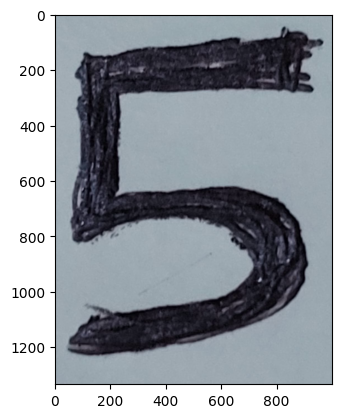

In [ ]:
#Charge une image en utilisant OpenCV format 3D (Red, Blue, GRIS) en couleurs
img=cv2.imread("sample_data/cinq2.jpg")

#affichage de l'image
plt.imshow(img)

#Convertit l'image de BGR en niveaux de gris, car le modèle CNN crées attendent des images en niveaux de gris
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#traitement de l'image:

#Redimensionne l'image en 28x28 pixels car cest la dimension que l'entrée de notre modele attend
img=cv2.resize(img,(28,28))



#Restructure l'image pour correspondre au format attendu par le modèle: (1:nombre d'images; 28,28:dimensions de l'image; 1 : nombre de canaux (niveaux de gris))
img=img.reshape(1,28,28,1)


#Normalise les valeurs des pixels entre 0 et 1
img=img/255

#Faire les predictions comme precedent
predictions=model.predict(img)
print(predictions)
predicted_class = np.argmax(predictions)      #retourne l indice de la classe ayant la plus grande proba
print("Classe prédite :", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


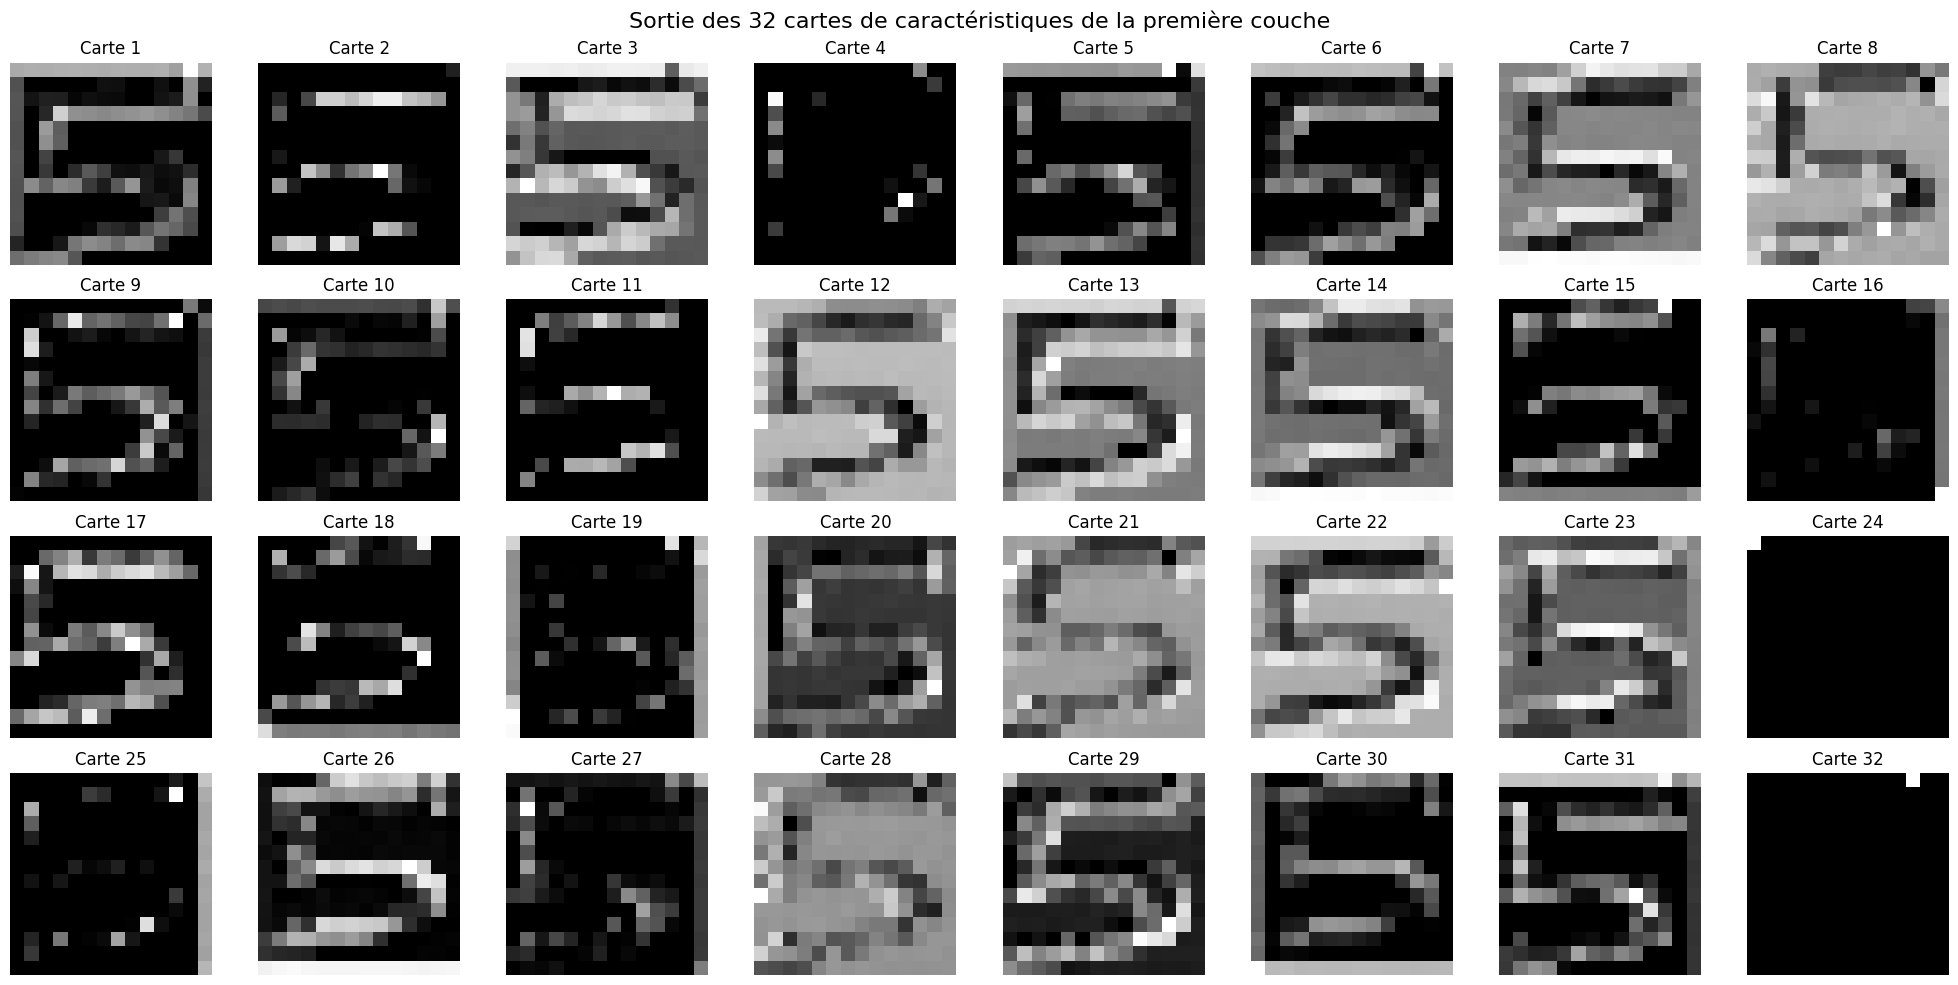

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image




# Créer le modèle
model1 = Sequential()

# Première couche de convolution
model1.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Charger l'image "deux.jpg"
img = image.load_img('sample_data/cinq2.jpg', target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)  # Convertir l'image en tableau numpy
img_array = np.expand_dims(img_array, axis=0)  # Ajouter la dimension du batch
img_array = img_array / 255.0  # Normaliser les pixels entre 0 et 1

# Créer un modèle pour obtenir la sortie après la première couche
intermediate_model = Sequential(model1.layers[:2])  # Inclut uniquement la première couche
output = intermediate_model.predict(img_array)

# Nombre total de cartes de caractéristiques (32 pour la première couche)
n_maps = output.shape[-1]  # Cela correspond à 32 pour la première couche

# Visualiser les 32 cartes de caractéristiques
fig, axes = plt.subplots(4, 8, figsize=(20, 10))  # Créer une grille de 4x8 pour afficher 32 cartes
axes = axes.ravel()

for i in range(n_maps):
    ax = axes[i]
    ax.imshow(output[0, :, :, i], cmap='gray')  # Afficher chaque carte de caractéristiques
    ax.axis('off')
    ax.set_title(f"Carte {i+1}")

plt.suptitle('Sortie des 32 cartes de caractéristiques de la première couche', fontsize=16)
plt.tight_layout()
plt.show()

>Le réseau voyait principalement les courbes communes aux deux chiffres, sans bien prendre en compte leur position spécifique qui permettrait de les différencier

>Parmi les solutions, on trouve l'augmentation de données :<br>
L'augmentation des données est une technique qui consiste à augmenter artificiellement l'ensemble d'entraînement en créant des copies modifiées d'un ensemble de données à l'aide de données existante.<br>
Imaginez que votre chiffre est dessiné sur un ballon
Vous étirez et déformez légèrement ce ballon dans différentes directions, le chiffre se déforme de manière naturelle, comme s'il était écrit à la main<br><br>
**Résultat** : Le réseau apprend à reconnaître le chiffre même s'il est légèrement déformé


>



---



**Prediction six**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[3.9817475e-02 4.3924438e-06 4.9854079e-03 4.5600482e-05 3.7070752e-08
  1.5899284e-05 9.3800741e-01 9.9712116e-10 1.7123723e-02 3.6708464e-08]]
Classe prédite : 6


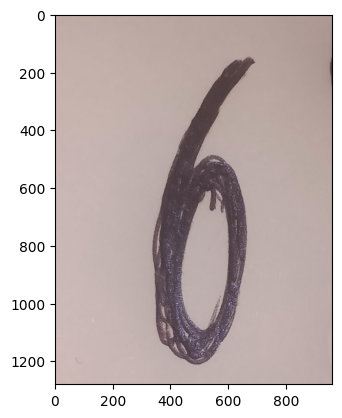

In [ ]:
#Charge une image en utilisant OpenCV
img=cv2.imread("sample_data/six1.jpg")

#affichage de l'image
plt.imshow(img)

#Convertit l'image en niveaux de gris, car le modèle CNN crées attendent des images en niveaux de gris
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#traitement de l'image:

#Redimensionne l'image en 28x28 pixels car cest la dimension que l'entrée de notre modele attend
img=cv2.resize(img,(28,28))



#Restructure l'image pour correspondre au format attendu par le modèle: (1:nombre d'images; 28,28:dimensions de l'image; 1 : nombre de canaux (niveaux de gris))
img=img.reshape(1,28,28,1)


#Normalise les valeurs des pixels entre 0 et 1
img=img/255

#Faire les predictions comme precedent
predictions=model.predict(img)
print(predictions)
predicted_class = np.argmax(predictions)      #retourne l indice de la classe ayant la plus grande proba
print("Classe prédite :", predicted_class)



---



>Maintenant, changeons la position du chiffre six de façon à ce qu'il ressemble à un zéro

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[2.8036116e-03 4.0953619e-08 7.3520187e-04 1.9177744e-04 3.5620454e-07
  8.5624124e-06 9.9585295e-01 1.1847864e-10 4.0756125e-04 2.0419117e-08]]
Classe prédite : 6


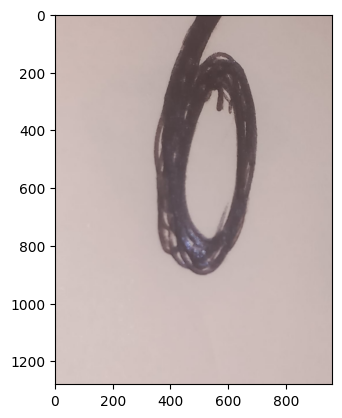

In [ ]:
#Charge une image en utilisant OpenCV
img=cv2.imread("sample_data/six2.jpg")

#affichage de l'image
plt.imshow(img)

#Convertit l'image de BGR en niveaux de gris, car le modèle CNN crées attendent des images en niveaux de gris
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#traitement de l'image:

#Redimensionne l'image en 28x28 pixels car cest la dimension que l'entrée de notre modele attend
img=cv2.resize(img,(28,28))



#Restructure l'image pour correspondre au format attendu par le modèle: (1:nombre d'images; 28,28:dimensions de l'image; 1 : nombre de canaux (niveaux de gris))
img=img.reshape(1,28,28,1)


#Normalise les valeurs des pixels entre 0 et 1
img=img/255

#Faire les predictions comme precedent
predictions=model.predict(img)
print(predictions)
predicted_class = np.argmax(predictions)      #retourne l indice de la classe ayant la plus grande proba
print("Classe prédite :", predicted_class)

>Le modèle prédit correctement le chiffre 6



---





---



>Dans cette dernièr partie, nous allons mettre en œuvre le modèle RF expliqué auparavant en suivant ces étapes qui seront detaillés dans chaque partie.<br>
 >**1.   Importation de la bibliothèque**<br>
 **2.   Choisir le nombre d'arbres optimal avec la validation croisée**<br>
 **3.    Affichage du nombre d'arbres optimal**<br>
 **4.   Construction du modèle avec le nombre optimal d'arbres**<br>
**5.   Calcul et affichage de la matrice de confusion**<br>
**6.    Calcul de la précision du modèle**<br>
**7.   Test du modèle**<br>
**8.   Test des images (notre propres images prises par une caméra**<br>
**9.   Limites du modèle**<br>

**1. Importation de la bibliothèque**

In [ ]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

**2. Choisir le nombre d'arbres optimal avec la validation croisée**

In [ ]:
import numpy as np
from sklearn import ensemble, model_selection
from tensorflow.keras.datasets import mnist

# Charger les données MNIST
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

# Aplatir les images de (28, 28) à (784,) et convertir en NumPy
x_train1 = x_train1.reshape(x_train1.shape[0], -1).astype(np.float32)
x_test1 = x_test1.reshape(x_test1.shape[0], -1).astype(np.float32)

# Normaliser les valeurs des pixels entre 0 et 1
x_train1 /= 255.0
x_test1 /= 255.0

# Liste des nombres d'arbres à tester
l = [10, 30, 50, 70]
d = {}  # Initialisation d'un dictionnaire vide

# Validation croisée pour chaque nombre d'arbres
for i in l:
    modele = ensemble.RandomForestClassifier(n_estimators=i, random_state=0)  # Modèle Random Forest
    scores = model_selection.cross_val_score(modele, x_train1, y_train1, cv=5, scoring='accuracy')  #À chaque itération, le modèle est entraîné sur 4 sous-ensembles et testé sur le sous-ensemble restant (cv=5)
    d[i] = np.mean(scores)  # Moyenne des scores

# Afficher les résultats
print(d)

# Trouver le nombre d'arbres avec la meilleure précision
val_max = max(d, key=d.get)
print("Nombre optimal d'arbres :", val_max)



{10: 0.9424333333333333, 30: 0.9605333333333332, 50: 0.9642666666666667, 70: 0.9650333333333332}
Nombre optimal d'arbres : 70


>On remarque que plus le nombre darbres augmente plus la précision du modèle augmente, comme le montre pour un nombre d'arbres donnee de 70 on a une précision de **96.503%**



---



>Maintenant, on va construire notre foret avec 70 arbres

**4. Construction du modèle avec le nombre optimal d'arbres**

In [ ]:
#Construction de notre modèle en l'assignant à une variable
forest =ensemble.RandomForestClassifier(n_estimators=70,random_state=0)

>Entrainement du modèle

In [ ]:
#Entrainement de notre modèle
train_for=forest.fit(x_train1,y_train1)

>Validation de notre modèle

In [ ]:
y_predFor=train_for.predict(x_test1)

**5. Calcul et affichage de la matrice de confusion**

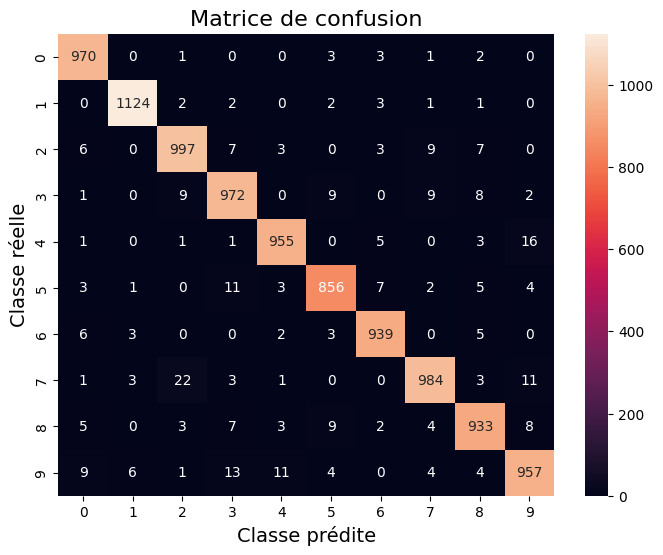

In [ ]:
# Matrice de confusion : st une table utilisée pour évaluer les performances d'un modèle de classification. Elle compare les valeurs réelles (y_test1) avec les valeurs prédites (y_predFor).
conf_matrix = metrics.confusion_matrix(y_test1, y_predFor)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=True, yticklabels=True)

# Ajout des étiquettes
plt.title("Matrice de confusion", fontsize=16)
plt.xlabel("Classe prédite", fontsize=14)
plt.ylabel("Classe réelle", fontsize=14)

# Affichage
plt.show()

>On remarque bien une difference entre le CNN et le RF:
*   1124 bonne predictions pour le le RF, alors que pour le CNN il a identifié 1132
*   Pour les autres classes on remarque bien que le modele se trompe encore surtout entre le **2** et le **7**





---



**6. Calcul de la précision du modèle**

In [ ]:
Précision = metrics.accuracy_score(y_test1, y_predFor)
print(f"Précision du modèle : {Précision}")

Précision du modèle : 0.9687


>On remarque qu'à partir de la matrice de confusion, on peut dire que la précision du modèle Random Forest sera inférieure à celle du CNN.



---



**8. Test des images (notre propres images prises par une caméra)**

Classe prédite pour l'image : 8


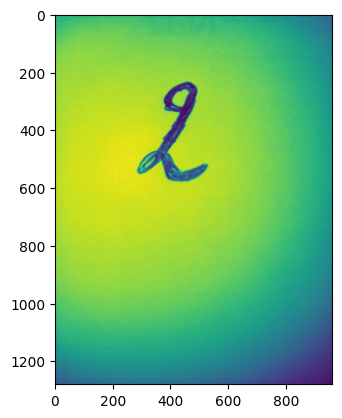

In [ ]:
import cv2
import numpy as np

# Charger l'image avec OpenCV
image_path = "sample_data/deux1.jpg"  # Chemin vers l'image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Charger en niveaux de gris

#Affichage du digit
plt.imshow(image)

# Redimensionner l'image à la taille attendue par le modèle (ex : 28x28 pour MNIST)
image_resized = cv2.resize(image, (28, 28))

# Aplatir l'image en un vecteur de caractéristiques
image_flattened = image_resized.flatten()  # Cela donne un vecteur de forme (784,) pour 28x28

# Normaliser l'image si nécessaire (par exemple, pour les modèles de type MNIST)
image_flattened = image_flattened / 255.0  # Normalisation à la plage [0, 1]

# Ajouter une dimension supplémentaire pour faire correspondre la forme attendue par le modèle
image_flattened = image_flattened.reshape(1, -1)  # Forme (1, 784) pour 28x28

# Prédiction avec le modèle
predicted_class = train_for.predict(image_flattened)

# Affichage de la prédiction
print(f"Classe prédite pour l'image : {predicted_class[0]}")


Classe prédite pour l'image : 8


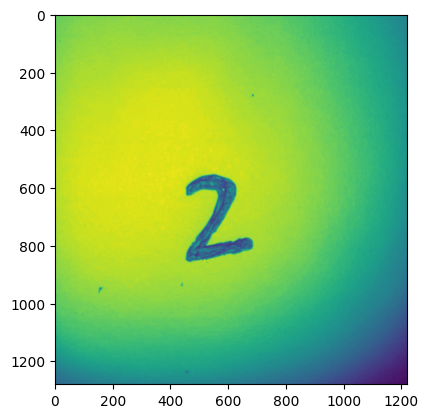

In [ ]:
import cv2
import numpy as np

# Charger l'image avec OpenCV
image_path = "sample_data/deux2.jpg"  # Chemin vers l'image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Charger en niveaux de gris

#Affichage du digit
plt.imshow(image)

# Redimensionner l'image à la taille attendue par le modèle (ex : 28x28 pour MNIST)
image_resized = cv2.resize(image, (28, 28))

# Aplatir l'image en un vecteur de caractéristiques
image_flattened = image_resized.flatten()  # Cela donne un vecteur de forme (784,) pour 28x28

# Normaliser l'image si nécessaire (par exemple, pour les modèles de type MNIST)
image_flattened = image_flattened / 255.0  # Normalisation à la plage [0, 1]

# Ajouter une dimension supplémentaire pour faire correspondre la forme attendue par le modèle
image_flattened = image_flattened.reshape(1, -1)  # Forme (1, 784) pour 28x28

# Prédiction avec le modèle
predicted_class = train_for.predict(image_flattened)

# Affichage de la prédiction
print(f"Classe prédite pour l'image : {predicted_class[0]}")

Classe prédite pour l'image : 8


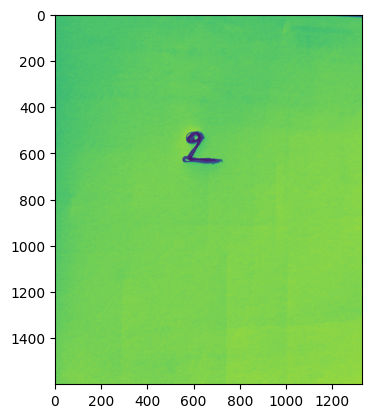

In [ ]:
import cv2
import numpy as np

# Charger l'image avec OpenCV
image_path = "sample_data/deux3.jpg"  # Chemin vers l'image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Charger en niveaux de gris

#Affichage du digit
plt.imshow(image)

# Redimensionner l'image à la taille attendue par le modèle (ex : 28x28 pour MNIST)
image_resized = cv2.resize(image, (28, 28))

# Aplatir l'image en un vecteur de caractéristiques
image_flattened = image_resized.flatten()  # Cela donne un vecteur de forme (784,) pour 28x28

# Normaliser l'image si nécessaire (par exemple, pour les modèles de type MNIST)
image_flattened = image_flattened / 255.0  # Normalisation à la plage [0, 1]

# Ajouter une dimension supplémentaire pour faire correspondre la forme attendue par le modèle
image_flattened = image_flattened.reshape(1, -1)  # Forme (1, 784) pour 28x28

# Prédiction avec le modèle
predicted_class = train_for.predict(image_flattened)

# Affichage de la prédiction
print(f"Classe prédite pour l'image : {predicted_class[0]}")

>On remarque bien que le modèle n'arrive pas à identifier le chiffre 2. La différence entre les deux modèles est que le CNN réussit à identifier correctement 2/3 des '2', mais fait souvent l'erreur de confondre le '2' avec le '8'.
>Cette confusion revient au faite que lees chiffres '2' et '8' partagent des caractéristiques visuelles similaires. Le '8' a deux boucles qui peuvent parfois ressembler à la forme du '2'



---



---



**Limites du modèle**

>1. CNN:<br>
>* Surapprentissage: le modèle parfois apprend trop bien les détails et le bruit.
des données d'entraînement, au point de perdre sa capacité à généraliser sur de nouvelles données, comme dans le cas de la confusion entre 3 et 5 génerée<br>
>* Les CNN demandent beaucoup de puissance de calcul (GPU/TPU) et de mémoire pour traiter les convolutions.<br>
>* Malgré les feature maps, parfois il est difficile d'expliquer pourquoi un CNN prend une certaine décision.<br><br>


>2. Forêt aléatoire:<br>
>* Les RF sont moins performants que les CNN pour les données complexes comme les images, car ils ne capturent pas bien les structures spatiales. Ils traitent les données de manière tabulaire, sans tenir compte de la proximité entre les pixels<br>
>* Taille et profondeur des arbres: Lorsque le nombre d'estimators (arbres) et la profondeur augmentent, le RF peut devenir coûteux en termes de calcul et de mémoire.<br>


**Liens utiles**

* https://dasher.wustl.edu/chem430/readings/basic-intro-cnn.pdf
* https://www.analyticsvidhya.com/blog/2020/02/mathematics-behind-convolutional-neural-network/
* https://hal.science/hal-03957224/document
* https://www.geeksforgeeks.org/decision-tree/
* https://medium.com/@saba99/feature-map-35ba7e6c689e





>